In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import warnings library
import warnings

# Ignore all warnings to keep output clean
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('D:/ML/seattle-weather.csv')

In [7]:
df.shape

(1461, 6)

In [8]:
# Define column names for better readability
col_names = ['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

# Assign the new column names to the dataset
df.columns = col_names

In [9]:
col_names

['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [11]:
# Display the count of unique values in each column
for col in col_names:
    print(f"Value counts for {col}:\n", df[col].value_counts(), "\n")

date
2015-12-31    1
2012-01-01    1
2012-01-02    1
2012-01-03    1
2012-01-04    1
             ..
2012-01-10    1
2012-01-09    1
2012-01-08    1
2012-01-07    1
2012-01-06    1
Name: count, Length: 1461, dtype: int64
precipitation
0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
33.5      1
47.2      1
22.4      1
29.5      1
21.8      1
Name: count, Length: 111, dtype: int64
temp_max
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-1.1      1
-1.6      1
-0.5      1
 35.6     1
 35.0     1
Name: count, Length: 67, dtype: int64
temp_min
 6.1     66
 10.0    64
 7.2     60
 11.7    60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 7.8     46
 14.4    46
 2.8     45
 12.2    45
 12.8    45
 3.9     44
 3.3     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      

In [12]:
# Display the count of unique values in the 'weather' column
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [13]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [14]:
# Define features (X) by dropping the target and date columns
X = df.drop(['weather', 'date'], axis=1)

# Define target variable (y) as the 'weather' column
y = df['weather']

In [15]:
# Split the dataset into training and testing sets
# 33% of the data will be used for testing, and 67% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train.shape, X_test.shape

# check data types in X_train
X_train.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
dtype: object

In [17]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with Gini impurity as the criterion and a max depth of 3
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Train the model using the training data
clf_gini.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gini = clf_gini.predict(X_test)

In [18]:
# Import accuracy_score to evaluate the model
from sklearn.metrics import accuracy_score

# Print the model's accuracy score on the test data
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8551


In [19]:
# Make predictions on the training data
y_pred_train_gini = clf_gini.predict(X_train)

# Print the accuracy score for the training set
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8548


In [21]:
# Print the model's accuracy score on the training set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

# Print the model's accuracy score on the test set
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8548
Test set score: 0.8551


In [22]:
# Import confusion_matrix to evaluate model performance
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)

In [23]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  0   0   0   0  15]
 [  0   0   0   0  34]
 [  0   0 195   1  15]
 [  0   0   5   3   0]
 [  0   0   0   0 215]]


              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.00      0.00      0.00        34
        rain       0.97      0.92      0.95       211
        snow       0.75      0.38      0.50         8
         sun       0.77      1.00      0.87       215

    accuracy                           0.86       483
   macro avg       0.50      0.46      0.46       483
weighted avg       0.78      0.86      0.81       483



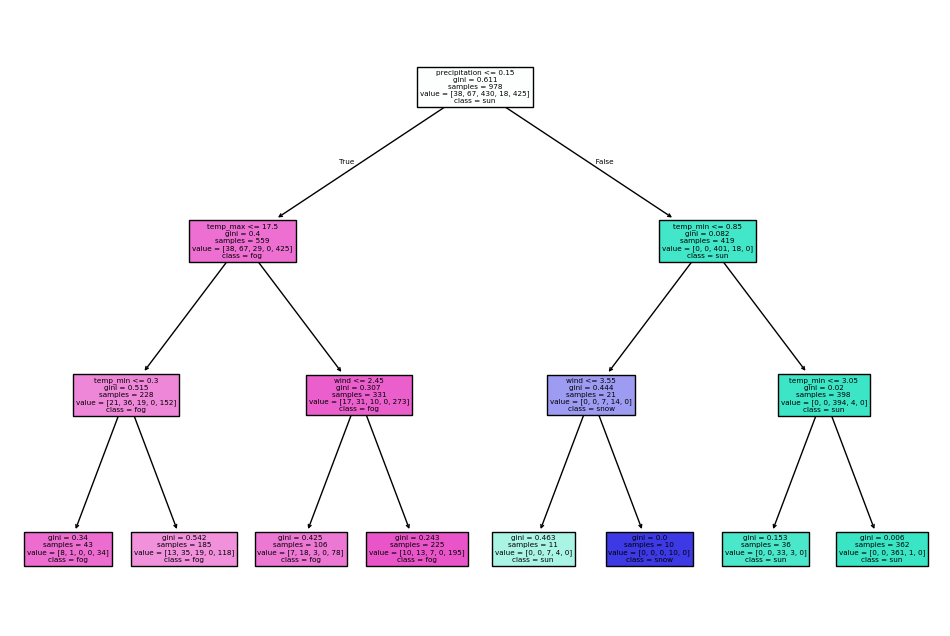

In [24]:
# Import classification_report to evaluate model performance
from sklearn.metrics import classification_report

# Print the classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred_gini))

# Import tree for visualization
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()